# **Natural Language Processing with Disaster Tweets**

<p><strong><u>What is Tweeter and how does it work?</u></strong></p>
<p>Twitter is a social media platform that allows users to share their thoughts, ideas, and updates in short messages called tweets. Users can follow others and see their tweets on their feed, as well as interact with them by liking, retweeting, or replying to tweets.</p>

<p>To use Twitter, users create an account and a profile with a username, bio, and profile picture. They can then start tweeting by typing out a message of up to 280 characters, attaching photos or videos, and using hashtags to categorize their content. Tweets can be seen by all followers in their feed, and can also be discovered by others through search and trending topics.</p>

<p>Twitter also offers features such as direct messaging, live video streaming, and Twitter Moments to help users connect and engage with each other. Overall, Twitter is a platform that enables users to share and consume information in real time, and to engage with a global audience on a wide range of topics.</p>

<p><strong><u>The dataset</u></strong>:</p>
<p>The disaster tweets dataset on Kaggle aims to classify tweets which refer to either about real disasters or not. This dataset is often used for natural language processing and machine learning tasks to analyze and predict the likelihood of a tweet referring to a real disaster event. The goal is to develop a model that can accurately identify disaster-related tweets to improve disaster response efforts and assist in crisis management.</p>

### <strong><u>Loading Important Libraries and Listing Input Data (pathways)</u></strong>:


<p><span style="background-color: #E8E8E8"><strong>"numpy"</strong></span>: <i>numpy</i> is a library used for mathematical operations on arrays and matrices, providing support for mathematical functions and operations that are optimized for numerical computing. </p>

<p><span style="background-color: #E8E8E8"><strong>"pandas"</strong></span>: <i>pandas</i> is a data manipulation and analysis library that provides data structures (such as DataFrame) and functions to work with structured data, enabling data cleaning, wrangling, and analysis tasks.</p>

<p><span style="background-color: #E8E8E8"><strong>"TfidfVectorizer"</strong></span>: The <i>TfidfVectorizer</i> class in sklearn is used to convert a collection of text documents into a matrix of TF-IDF features. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents. The TfidfVectorizer calculates the TF-IDF scores for each word in the document and creates a matrix where each row represents a document and each column represents a word, with the cell values representing the TF-IDF scores.</p>

<p><span style="background-color: #E8E8E8"><strong>"train_test_split"</strong></span>: The <i>train_test_split</i> function in sklearn is used to split a dataset into training and testing sets. It takes as input the features and target variables of a dataset and splits them into two sets based on a specified test size or proportion. This allows for the model to be trained on one portion of the data and tested on another portion to evaluate its performance.</p>

<p><span style="background-color: #E8E8E8"><strong>"RandomForestClassifier"</strong></span>: The <i>RandomForestClassifier</i> fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy. It gets imported from the sklearn.ensemble module, which is a popular algorithm for ensemble learning. Ensemble learning involves combining multiple machine learning models to improve predictive performance.</p>

<p><span style="background-color: #E8E8E8"><strong>"classification_report"</strong></span>: The <i>classification_report</i> function generates a text report showing the main classification metrics for the classifier, such as precision, recall, and F1-score.</p>

<p><span style="background-color: #E8E8E8"><strong>"accuracy_score"</strong></span>: The <i>accuracy_score</i> function calculates the accuracy of the classifier by comparing the predicted labels with the actual labels.</p>

In [1]:
##=========================================================================================
# This Python 3 environment comes with many helpful analytics libraries installed.
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python.
##=========================================================================================

import warnings # manage warnings.
import numpy as np # linear algebra.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
import seaborn as sns # fancy library for plots.
import matplotlib.pyplot as plt # for plots.
from wordcloud import WordCloud # form a wordcloud.
from sklearn.feature_extraction.text import TfidfVectorizer # turn a collection of text documents into a matrix.
from sklearn.model_selection import train_test_split # split a dataset into training and testing sets.
from sklearn.ensemble import RandomForestClassifier # for prediction.
from sklearn.metrics import classification_report, accuracy_score # to calculate the accuracy.

##=========================================================================================
# Input data files are available in the read-only "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory.
# Listing the input directories:
##=========================================================================================
print("Input Directories are as follows:")
print("")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##=========================================================================================
# Note:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All".
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.
##=========================================================================================

Input Directories are as follows:

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


### <strong> <u> Loading the Data </u> </strong>:
<p>Loading the training and the testing data.</p>

In [2]:
# Load the training data:
train_data = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
train_data.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
# Load the testing data:
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
test_data.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

### <strong> <u> 1. Distribution of Target Labels </u> </strong>:
<p>This shows the distribution of disaster (target=1) and non-disaster (target=0) tweets in the training dataset.</p>

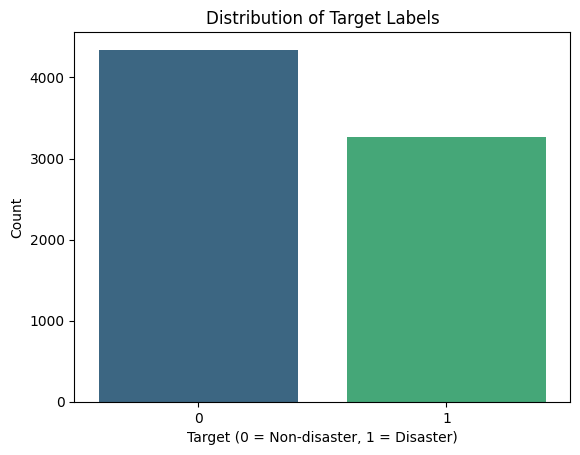

In [4]:
# Plot target distribution:
sns.countplot(x=train_data['target'], palette='viridis')
plt.title('Distribution of Target Labels')
plt.xlabel('Target (0 = Non-disaster, 1 = Disaster)')
plt.ylabel('Count')
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>It would appear that there are more "non-disaster" labeled tweets in this dataset, however we can see that the "disaster" labeled ones are not too far off. Therefore, it is highly likely that we could separate the two based on words used and probably even make satisfying predictions.</p>

### <strong> <u> 2. Tweet Length Distribution </u> </strong>:
<p>Visualize the distribution of tweet lengths in the training and testing datasets.</p>

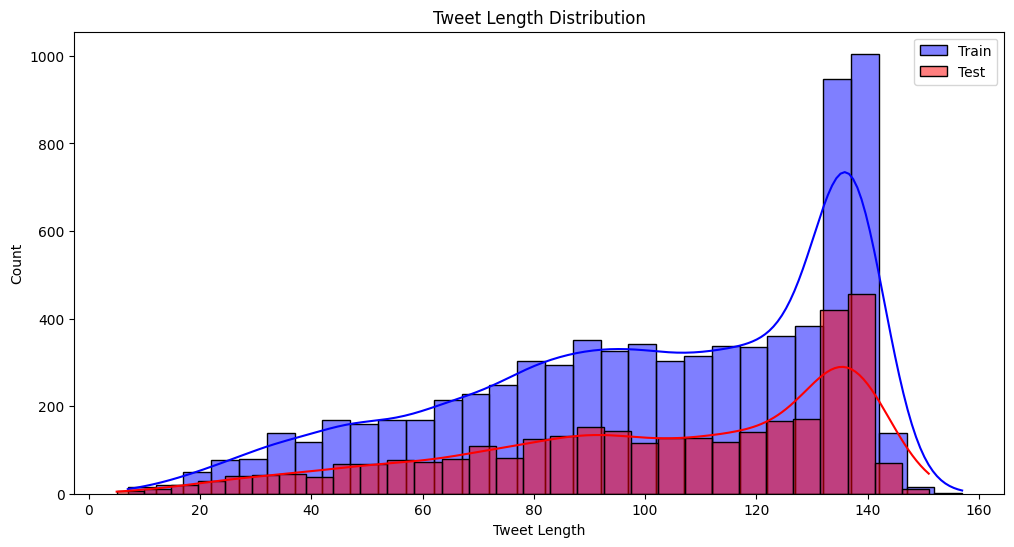

In [5]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Get tweet lengths:
a = train_data['text'].apply(len)
b = test_data['text'].apply(len)

# Plot tweet lengths
plt.figure(figsize=(12, 6))
sns.histplot(a, bins=30, kde=True, color='blue', label='Train')
sns.histplot(b, bins=30, kde=True, color='red', label='Test')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.legend()
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>As the limit per tweet is around 280 words, it is surprising to see that most tweets are half that length and almost never surpass 160 words. As we can also see from the split, the two distrinutions of the test and the train datasets follow a similar pattern. So we should expect no surprises in our results.</p>

### <strong> <u> 3. Word Cloud for Disaster and Non-Disaster Tweets </u> </strong>:
<p>Here we use word clouds to visualize the most common words in disaster (target=1) and non-disaster (target=0) tweets.</p>

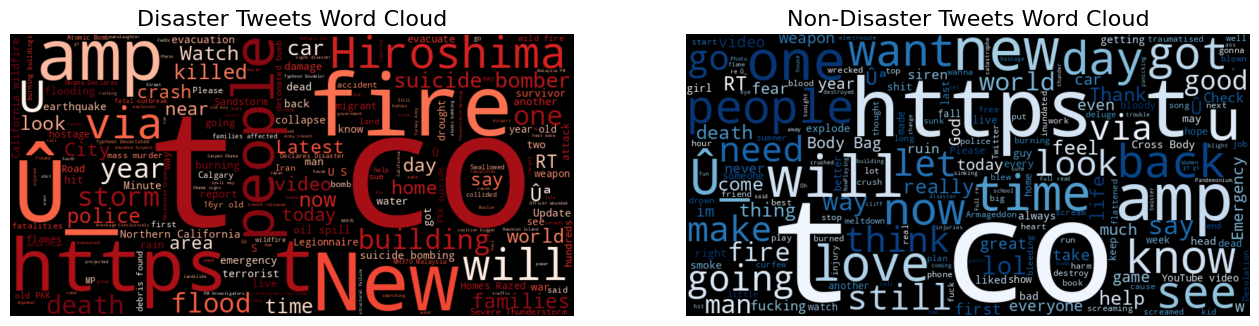

In [6]:
# Generate word clouds:
disaster_tweets = " ".join(train_data[train_data['target'] == 1]['text'])
non_disaster_tweets = " ".join(train_data[train_data['target'] == 0]['text'])

# Plot the word clouds:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Disaster tweets word cloud:
wordcloud_disaster = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(disaster_tweets)
ax[0].imshow(wordcloud_disaster, interpolation='bilinear')
ax[0].set_title('Disaster Tweets Word Cloud', fontsize=16)
ax[0].axis('off')

# Non-disaster tweets word cloud:
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(non_disaster_tweets)
ax[1].imshow(wordcloud_non_disaster, interpolation='bilinear')
ax[1].set_title('Non-Disaster Tweets Word Cloud', fontsize=16)
ax[1].axis('off')

plt.show()


<p><u><i>Comments on the graphs above</i></u>:</p>
<p>It seems that the top words get re-used in both sets of data. Many people must be linking websites or videos to their tweets (and thus, "https" is the top result in the wordclouds) sharing either their opinions, or real disasters. The word cloud that depicts disasters, seems to have names for those disasters, like FIRE, or STORM, etc. used more frequently. And also on a first glance, it uses more "negative" words, like KILLED, or CRASH as well as others. Maybe there is still hope to detect some dissimilarities and label tweets accurately as true disasters, or not.</p>

### <strong> <u> Data Cleaning and Imputing </u> </strong>:
<p>Here we shall see if our data have any missing values and if they do, try to impute them.</p>

In [7]:
# Check if there are missing values. If both return FALSE, then no values are missing.
print(train_data['text'].isnull().values.any(), test_data['text'].isnull().values.any())

# If there were missing values (for now, it fills NaN values with empty spaces):
#train_data['text'] = train_data['text'].fillna("")
#test_data['text'] = test_data['text'].fillna("")

False False


### <strong> <u> Vectorizing the Text in Our Dataset </u> </strong>:
<p>Text vectorization using TfidfVectorizer stands for "Term Frequency-Inverse Document Frequency Vectorizer." It is a text processing technique used in natural language processing and machine learning to convert a collection of text documents into a matrix of TF-IDF features.</p>

<p>TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents. It calculates the product of two values: term frequency (TF) and inverse document frequency (IDF). The TF component measures the frequency of a term in a document, while the IDF component measures how unique or important the term is across all documents.</p>

<p>Therefore, essentially, text vectorization with TfidfVectorizer is like using a special tool to turn words into numbers. This tool looks at how often each word appears in a piece of text, but also considers how common or rare each word is in all the text. This way, important or unique words get higher numbers, while common words get lower numbers. This helps us understand and compare different pieces of text more easily.</p>

In [8]:
# Here we separate the text data (X) and target variable (y) from the train_data dataframe:
X = train_data['text']
y = train_data['target']

##=========================================================================================
# Vectorize text using TfidfVectorizer:
# max_features=10000: Limits the vocabulary size to 10,000 words.
# ngram_range=(1, 2): Creates unigrams (single words) and bigrams (pairs of words).
# stop_words='english': Removes common English stop words like "the", "a", etc.
##=========================================================================================
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

### <strong> <u> Random Forest Classifier </u> </strong>:

<p>The Random Forest Classifier is a machine learning algorithm that builds multiple decision trees and combines their outputs to improve the accuracy and robustness of the predictions. Here are the steps it takes to form its output:</p>

<ol>
    <li>Bootstrap Sampling: Random subsets of the data (with replacement) are created to train individual decision trees.</li>
    <li>Feature Randomness: At each split in a tree, a random subset of features is considered to find the best split. This reduces the correlation between trees.</li>
    <li>Building Decision Trees: Individual decision trees are trained on the bootstrap samples. Each tree outputs a class prediction.</li>
    <li>Aggregation: For classification, the final prediction is made using the majority vote from all the individual trees.</li>
</ol>

In [9]:
##===========================================================================
# Train a Random Forest Classifier:
# Key Hyperparameters:
#  n_estimators: Number of trees in the forest.
#  max_features: Maximum number of features considered for splitting.
#  max_depth: Maximum depth of each tree.
#  criterion: The function to measure split quality (e.g., "gini" or "entropy").
##===========================================================================
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate on validation set:
y_pred = classifier.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("")
print(classification_report(y_val, y_pred))

# Make predictions on the test set:
test_vectorized = vectorizer.transform(test_data['text'])
test_predictions = classifier.predict(test_vectorized)

Validation Accuracy: 0.7767564018384767

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       874
           1       0.82      0.61      0.70       649

    accuracy                           0.78      1523
   macro avg       0.79      0.75      0.76      1523
weighted avg       0.78      0.78      0.77      1523



### <strong> <u> Submitting the Results </u> </strong>:

In [10]:
# Prepare submission file:
submission = pd.DataFrame({'id': test_data['id'], 'target': test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file created!")

Submission file created!


### <strong> <u> Conclusions </u> </strong>:
<p>This study applied Natural Language Processing (NLP) techniques, specifically TF-IDF for feature extraction and a Random Forest classifier, to classify disaster-related tweets. The model achieved a validation accuracy of 77.68%, with strong precision for disaster tweets (0.82) but lower recall (0.61), indicating that while false positives were minimized, some disaster-related tweets were misclassified.</p>

<p>Improving recall through class balancing, threshold adjustments, or enhanced feature engineering could further refine performance. Overall, this approach demonstrates the effectiveness of statistical NLP and machine learning in disaster tweet classification, with potential for real-time application in crisis response.</p>

### <strong> <u> Citation </u> </strong>:
<p>Addison Howard, Devrishi, Phil Culliton, and Yufeng Guo. (2019). <em>Natural Language Processing with Disaster Tweets</em>. Retrieved from https://www.kaggle.com/competitions/nlp-getting-started</p>
<p>Spärck Jones, K. (1972). <em>A statistical interpretation of term specificity and its application in retrieval</em>. Journal of Documentation, 28(1), 11–21. https://doi.org/10.1108/eb026526</p>
<p>Breiman, L. (2001). <em>Random forests. Machine Learning</em>, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324</p>
<p>Hastie, T., Tibshirani, R., & Friedman, J. (2009). <em>The elements of statistical learning: Data mining, inference, and prediction</em> (2nd ed.). Springer. https://doi.org/10.1007/978-0-387-84858-7</p>
<p>Géron, A. (2019). <em>Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow</em> (2nd ed.). O’Reilly Media.</p>